<a href="https://colab.research.google.com/github/joshpodl/An-Exploration-of-Open-Data/blob/main/AnExplorationOfOpenData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# import NYPD dataset
import pandas as pd
import matplotlib.pyplot as plt
url = "https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718)
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299008265,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086)
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526)


In [48]:
# clean data by removing columns that will not be used - X_COORD_CD, Y_COORD_CD, Latitude, Longitude, New Georeferenced Column
df = df.drop(['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], axis=1)
df.head()


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE
0,298874520,01/04/2025,439,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553004,F,M,7,0,25-44,M,BLACK
1,298799078,01/02/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,0,25-44,F,BLACK
2,298921520,01/05/2025,779,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,K,76,0,45-64,M,WHITE
3,299008265,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,M,BLACK
4,298969999,01/06/2025,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,73,25-44,M,WHITE


In [63]:
# create data frames where boro = k or m for Brooklyn Manhattan comparison
df_bk = df[df['ARREST_BORO'] == 'K']
df_mn = df[df['ARREST_BORO'] == 'M']

#create summmary statistics
bk_arrests = df_bk['PERP_RACE'].value_counts()
mn_arrests = df_mn['PERP_RACE'].value_counts()
bk_arrests_pct = df_bk['PERP_RACE'].value_counts(normalize=True).mul(100).round(1)
mn_arrests_pct = df_mn['PERP_RACE'].value_counts(normalize=True).mul(100).round(1)

In [64]:
# data frame with stats for arrests by race in each boro
arrests_by_race = pd.DataFrame({'Brooklyn Arrests' : bk_arrests, 'Manhattan Arrests' : mn_arrests,'Percent of Brooklyn Arrests' : bk_arrests_pct, 'Percent of Manhattan Arrests' : mn_arrests_pct}).reset_index()
arrests_by_race

,PERP_RACE,Brooklyn Arrests,Manhattan Arrests,Percent of Brooklyn Arrests,Percent of Manhattan Arrests
0,AMERICAN INDIAN/ALASKAN NATIVE,41,59,0.2,0.3
1,ASIAN / PACIFIC ISLANDER,1094,652,5.5,3.8
2,BLACK,11239,8305,56.0,48.5
3,BLACK HISPANIC,1120,2060,5.6,12.0
4,UNKNOWN,62,64,0.3,0.4
5,WHITE,2644,1868,13.2,10.9
6,WHITE HISPANIC,3864,4125,19.3,24.1


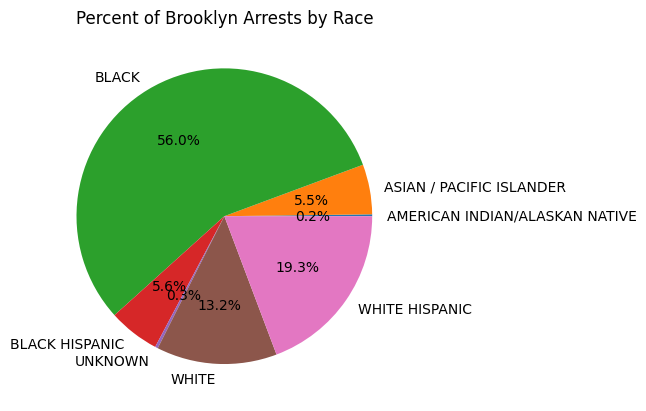

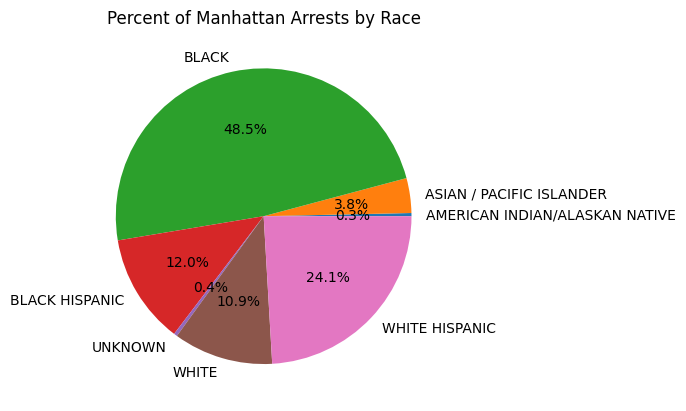

In [67]:
# pie chart for percent of brooklyn and manhattan arrests by race
plt.pie(arrests_by_race['Brooklyn Arrests'], labels= arrests_by_race['PERP_RACE'], autopct='%1.1f%%')
plt.title('Percent of Brooklyn Arrests by Race')
plt.show()

plt.pie(arrests_by_race['Manhattan Arrests'], labels= arrests_by_race['PERP_RACE'], autopct='%1.1f%%')
plt.title('Percent of Manhattan Arrests by Race')
plt.show()

**Conclusion**

In both Manhattan and Brooklyn, the largest proportion of arrested civilians are Black. The largest differences in the two boroughs are seen when looking at Black and Hispanic rates. 56% of perps arrested in Brooklyn are Black, outpacing 48.5% of arrests made in Manhattan. On the flip side, 36.1% of perps arrested in Manhattan are Hispanic compared to 24.9% in Brooklyn. Further context would be needed as to the demographic breakdown of each borough.